In [201]:
%matplotlib inline

In [202]:
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pprint
#from statistics import mean, median, variance
plt.rcParams['figure.figsize'] = [7, 5]

In [203]:
annapolis, boulder, duluth, iowacity, manhattan = dict(), dict(), dict(), dict(), dict()
allcities = [annapolis, boulder, duluth, iowacity, manhattan]
portland, princeton = dict(), dict()
# cities = [manhattan]
# cities = [annapolis]
cities = [annapolis, boulder, duluth, manhattan]
betas = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
cars = []

In [204]:
def name_cities():
    allcitiesnames = ['Annapolis', 'Boulder', 'Duluth', 'IowaCity', 'Manhattan']
    for city, name in zip(allcities, allcitiesnames):
        city['name'] = name
#     citiesnames = ['Manhattan']
#     citiesnames = ['Annapolis']
#     citiesnames = ['Manhattan', 'Annapolis']
    citiesnames = ['Annapolis', 'Boulder', 'Duluth', 'Manhattan']
    for city2, name2 in zip(cities, citiesnames):
        city2['name'] = name2

In [205]:
def get_cost_from_file(file_name):
    with open(file_name, 'r') as file:
        for line in file:
            data = line.split(',')
            return float(data[1]) #this is the overhead

In [206]:
def get_overheads_from_file(file_name):
    cars = set()
    data = []
    with open(file_name, 'r') as file:
        for line in file:
            curr = line.split(',')
            car_number = curr[7]
            if (car_number not in cars):
                cars.add(car_number)
                data.append(float(curr[6])) #this is the cost
#     return data
    np.array(data).astype(np.float)
    return np.mean(data)
#     return np.median(data)

In [207]:
def get_file_name(city_folder, letter, aval, bval, seed, scope=None):
    name = '_a' + str(aval) + '_b' + str(bval) + '_s' + str(seed) + '.csv'
    if (scope==None):
        return 'results/' + city_folder + '/' + letter + '/' + name
    else:
        return 'results/' + city_folder + '/' + letter + '/' + scope + '/' + scope + name

In [208]:
def get_data_from_experiment(city_folder, letter, exp, scope=None):
    beta_values = betas
    data = []
    means = []
    std = []
    for bval in beta_values:
        bdata = []
        seeds = [0, 1, 2, 3, 4]
        for seed in seeds:
            file = get_file_name(city_folder, letter, 0, bval, seed, scope)
            if (exp=="cost"):
                x = get_cost_from_file(file) #returns only the global/local cost
                bdata.append(x) #holding all the costs for a specific beta value 
            else:
                x = get_overheads_from_file(file)
#                 bdata += x
                bdata.append(x) #holding all the overheads for a specific beta value 
        data.append(bdata)
        bmean = np.mean(bdata)
        means.append(bmean)
        bvar = np.std(bdata)
        std.append(bvar)
    return data, means, std

In [209]:
def global_graphs(city_folder):
    global_costs, global_cost_means, global_cost_std = get_data_from_experiment(city_folder, 'beta', 'cost', 'global')
    return global_costs, global_cost_means, global_cost_std

def local_graphs(city_folder):
    local_costs, local_cost_means, local_cost_std = get_data_from_experiment(city_folder, 'beta', 'cost', 'local')
    return local_costs, local_cost_means, local_cost_std

In [210]:
def overheads_graphs(city_folder):
    overheads, overhead_means, overhead_std = get_data_from_experiment(city_folder, 'beta', 'overhead')
    return overheads, overhead_means, overhead_std

In [211]:
def get_data_for_all_cities():
    name_cities()
    for city in cities:
        gcosts, gmeans, gstd = global_graphs(city['name'])
        city['gcosts'] = gcosts
        city['gmeans'] = gmeans
        city['gstd'] = gstd
        lcosts, lmeans, lstd = local_graphs(city['name'])
        city['lcosts'] = lcosts
        city['lmeans'] = lmeans
        city['lstd'] = gstd
        print('Costs for ' + str(city['name']) + ' loaded!')
        overheads, omean, ostd = overheads_graphs(city['name'])
        city['overheads'] = overheads
        city['omean'] = omean
        city['ostd'] = ostd
        print('Overheads for ' + str(city['name']) + ' loaded!')

In [212]:
def boxplot(title, xname, yname, data, xlabels, means):
    fig, ax = plt.subplots()
    ax.set_title(title)
    ax.boxplot(data, labels=xlabels)
    ax.plot([(float(x)* 10 + 1) for x in xlabels], means, marker='D')
    ax.set_ylabel(yname)
    ax.set_xlabel(xname)
    plt.savefig(str(title + '.png'), bbox_inches='tight', dpi=300)
    plt.show()

def scatter_line_plot(title, xname, yname, x, y, yerror):
    fig, ax = plt.subplots()
    y = np.log(y)
    yerror = np.log(yerror)
    ax.errorbar(x, y, yerr=yerror, marker='D')
    ax.set_title(title)
    ax.set_ylabel(yname)
    ax.set_xlabel(xname)
    plt.show()

In [213]:
def global_and_local():
    for city in cities:
        costs, means, std = global_local_graphs(city['name'])
        boxplot(str('Global Costs Boxplot ' + city['name']), 'Beta Values', 'Global Cost Values', costs, betas, means)

In [214]:
get_data_for_all_cities()

Costs for Annapolis loaded!
Overheads for Annapolis loaded!
Costs for Boulder loaded!
Overheads for Boulder loaded!
Costs for Duluth loaded!
Overheads for Duluth loaded!
Costs for Manhattan loaded!
Overheads for Manhattan loaded!


In [215]:
def plot():
    for city in cities:
        boxplot(str('Global Costs Boxplot ' + city['name']), 'Beta Values', 'Global Cost Values', city['gcosts'],
                betas, city['gmeans'])
        boxplot(str('Local Costs Boxplot ' + city['name']), 'Beta Values', 'Local Cost Values', city['lcosts'],
                betas, city['lmeans'])
        boxplot(str('Overhead Boxplot ' + city['name']), 'Beta Values', 'Overhead Values', city['overheads'],
                betas, city['omean'])
        

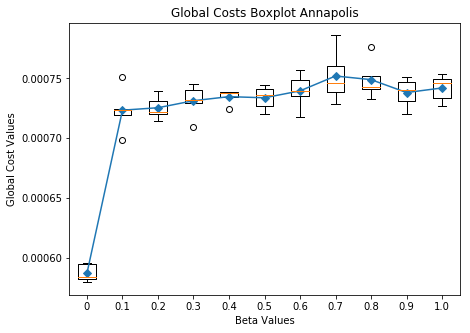

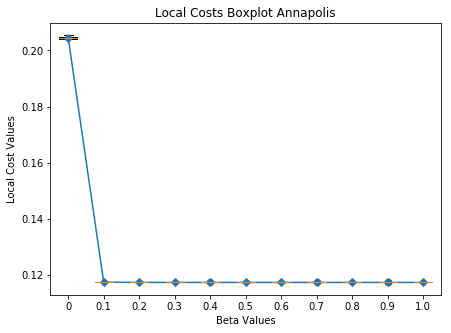

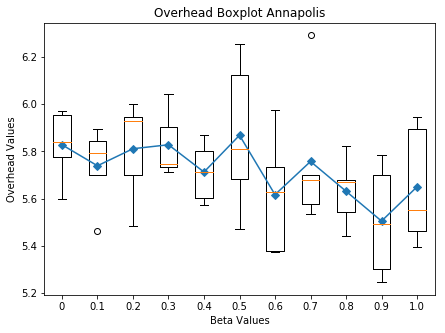

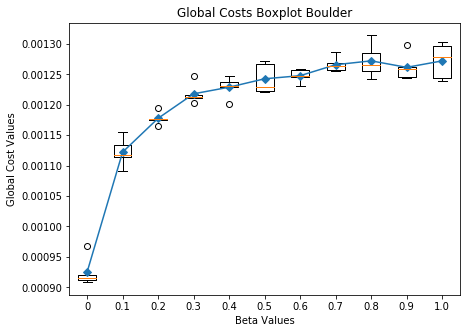

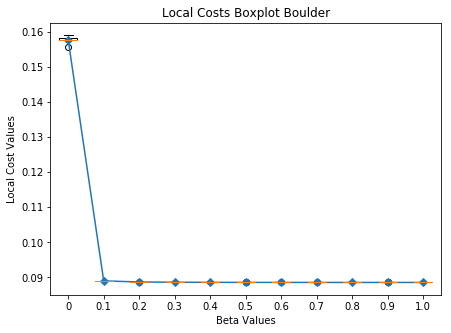

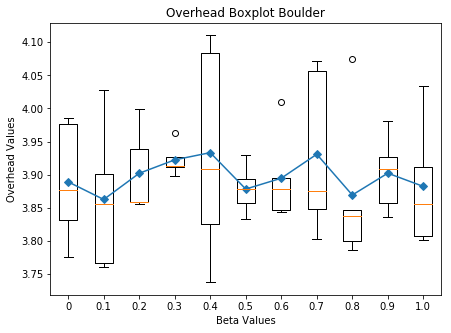

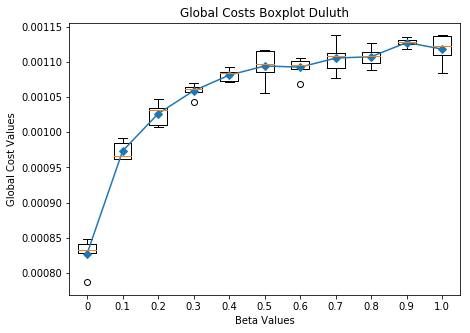

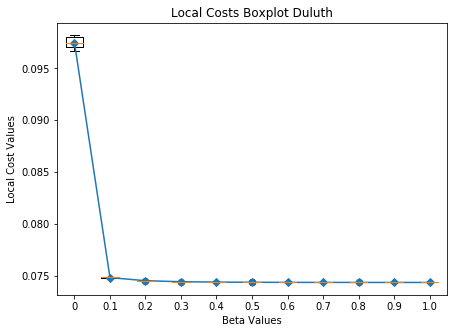

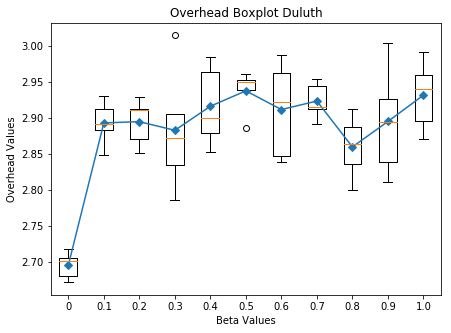

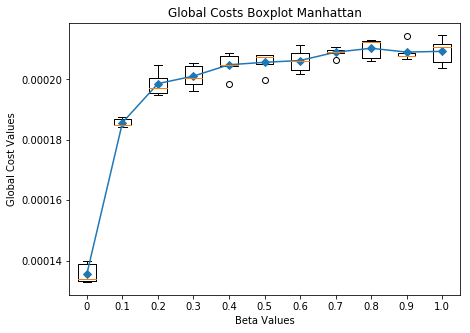

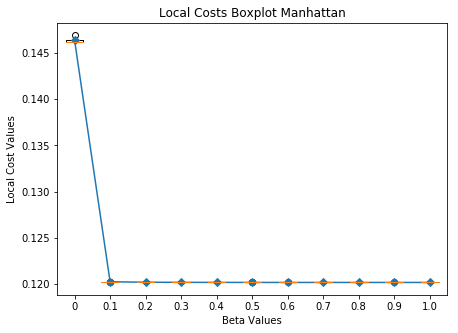

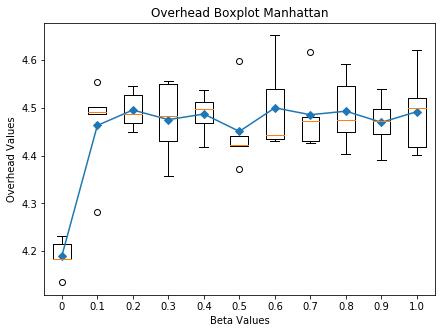

In [216]:
plot()

Annapolis
11
55


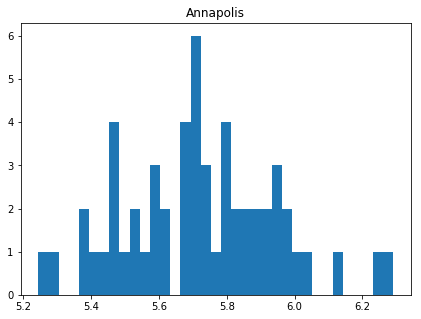

Boulder
11
55


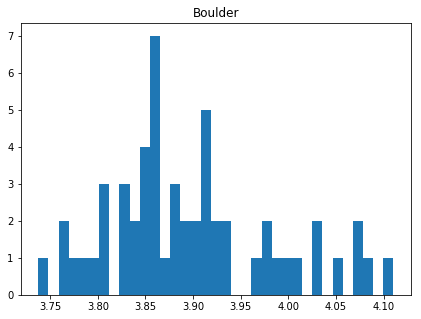

Duluth
11
55


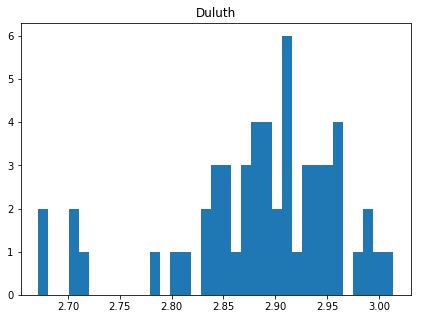

Manhattan
11
55


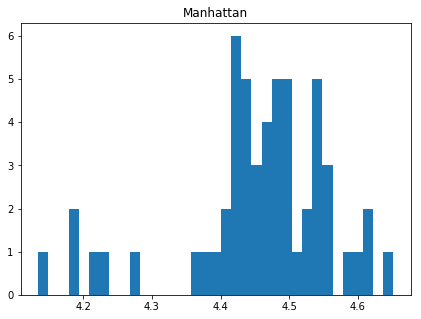

In [217]:
for city in cities:
    print city['name']
    print len(city['overheads'])
    all_costs = []
    for lcost in city['overheads']:
        all_costs += lcost
    print len(all_costs)
    plt.hist(all_costs, bins=35)
    plt.title(city['name'])
    plt.show()       

Annapolis
11
55


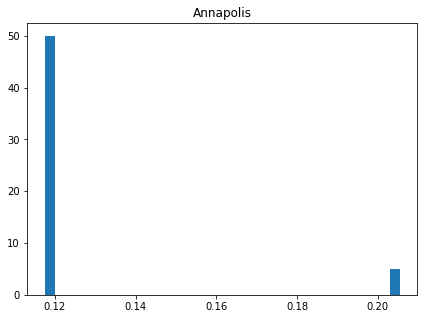

Boulder
11
55


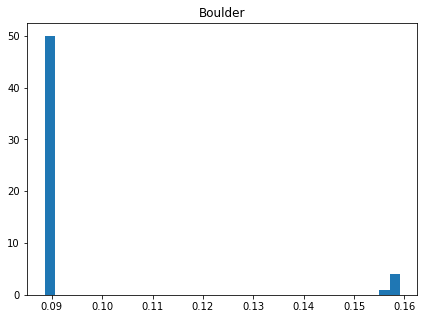

Duluth
11
55


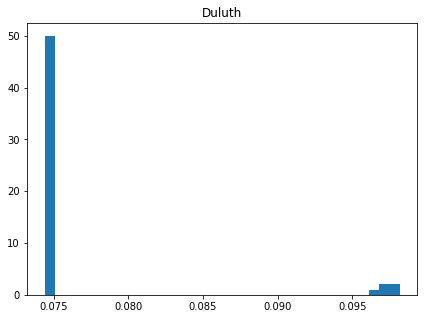

Manhattan
11
55


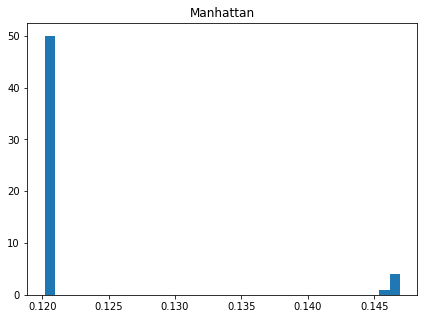

In [218]:
for city in cities:
    print city['name']
    print len(city['lcosts'])
    all_costs = []
    for lcost in city['lcosts']:
        all_costs += lcost
    print len(all_costs)
    plt.hist(all_costs, bins=35)
    plt.title(city['name'])
    plt.show()

[0.20406638951754774, 0.20447349154459743, 0.20539072300904493, 0.20400487123522812, 0.2048942089089125, 0.15827674211313203, 0.1578284430546287, 0.1590466817785611, 0.1576777215760546, 0.15577543960788537, 0.09817888038332462, 0.09669480394451975, 0.0980504304107136, 0.09745902420070406, 0.09701543081974973, 0.14615618283975965, 0.14623566216437572, 0.14692370453520567, 0.14625175872362461, 0.1463922731123024]


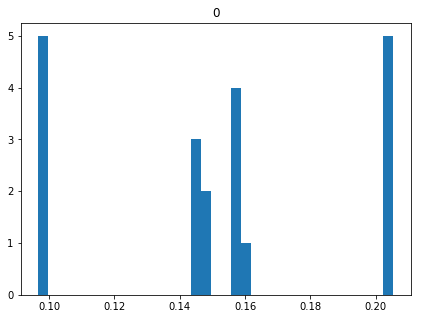

[0.11743093353523769, 0.11743173694742254, 0.11743110222197296, 0.11743126216195836, 0.11743172140052266, 0.08856245533456589, 0.08856554414725591, 0.08856233661490709, 0.08856192433123242, 0.08856225551294955, 0.07440203608335506, 0.07440212798034884, 0.07440299682402758, 0.07440022690968186, 0.07440165641176605, 0.12017177109844383, 0.12017097739700243, 0.12017126091788953, 0.12017107084113104, 0.12017038640736125]


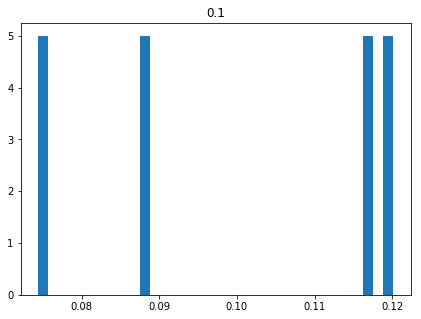

[0.11744630841586079, 0.11745305695770082, 0.11745219803437044, 0.11744862704694688, 0.11744672156588766, 0.08866989184732449, 0.08869497045939603, 0.08868902097293759, 0.08868578481339959, 0.08868386085751512, 0.07455275462671104, 0.07456497781986927, 0.0745579107264414, 0.07454300189670794, 0.07455664658398349, 0.12019177793292712, 0.12019012279344468, 0.12018897890749261, 0.12019741505671755, 0.12019458641121566]


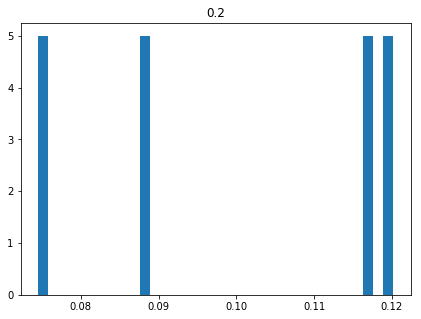

[0.11743296558669944, 0.11743291453008103, 0.11743313783284194, 0.11743350465852195, 0.11743303367095972, 0.08857707146017366, 0.08858067323563262, 0.08857649328030297, 0.088574796267835, 0.08857826807396385, 0.0744200045813081, 0.07442035613221529, 0.07442163672374649, 0.07442232319619141, 0.07441780594187096, 0.12017436193998858, 0.12017532622674773, 0.12017472078514847, 0.12017333200937355, 0.12017521579050783]


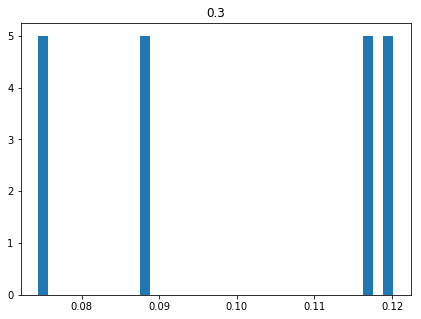

[0.11742999537707943, 0.11742999537707943, 0.11742999537707943, 0.11742999537707943, 0.11742999537707943, 0.08854789813120248, 0.08854789813120248, 0.08854789813120248, 0.08854789813120248, 0.08854789813120248, 0.07438654302623501, 0.07438654302623501, 0.07438654302623501, 0.07438654302623501, 0.07438654302623501, 0.12016901468014153, 0.12016901468014153, 0.12016901468014153, 0.12016901468014153, 0.12016901468014153]


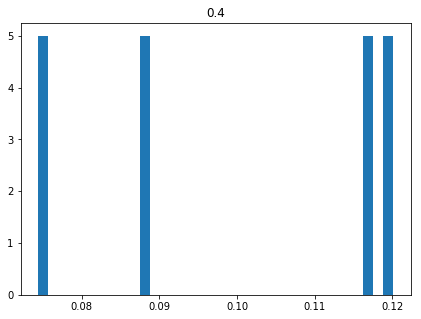

[0.11743006792096869, 0.1174300802461162, 0.11743010524999008, 0.11743003926934793, 0.11743011973324444, 0.08854883833063434, 0.08854920631917412, 0.08854919783877814, 0.08854896680170311, 0.08854937983674749, 0.07438769514717619, 0.07438792517099904, 0.07438747637992985, 0.0743877722745788, 0.07438765624472116, 0.12016928854113414, 0.12016925022032844, 0.12016914614170764, 0.12016912484166732, 0.12016907783038855]


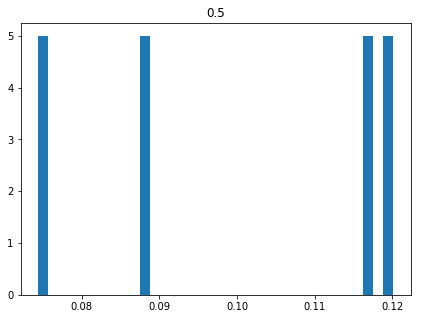

[0.11743111878021369, 0.11743099415090726, 0.11743066564037938, 0.11743052182381596, 0.11743116060260707, 0.08855424460451808, 0.08855525406299342, 0.08855566866331922, 0.08855270901795927, 0.08855490829003207, 0.07439335093450149, 0.07439344401710703, 0.07439451187940281, 0.07439395402830302, 0.07439322813928788, 0.12017007986851802, 0.12017028550552716, 0.12017005366357746, 0.12016996111685144, 0.12016982453936276]


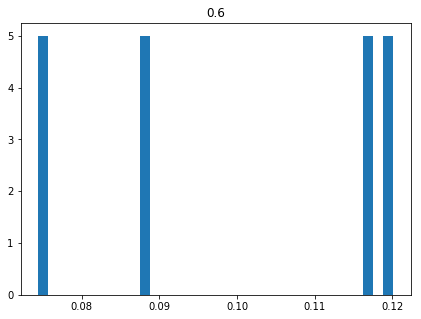

[0.11743795588305406, 0.11743947218185469, 0.11743851057351605, 0.11743698730301765, 0.11743706972286654, 0.08860480431440838, 0.08861461614765054, 0.08861049272406324, 0.0886080665226758, 0.08860535916007527, 0.07446617464895035, 0.07445446337406714, 0.07444919732206032, 0.0744589987095644, 0.07445604887022528, 0.12018112804202727, 0.12017885421120586, 0.12018144111671097, 0.12018051160423676, 0.12017783636984009]


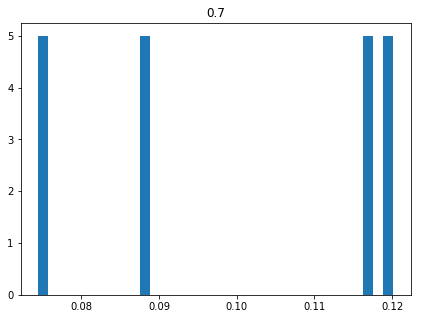

[0.11751029128518749, 0.11751373438893131, 0.11752889105241406, 0.1175262844266608, 0.11751962369733007, 0.08899534609704936, 0.08897734943925621, 0.08900473336999819, 0.08897590042729232, 0.08900418679245366, 0.07486471384512515, 0.07486373919261617, 0.0748283485979122, 0.07484217087843309, 0.07486317917668142, 0.12024444888142775, 0.12023874934615163, 0.12024666573455832, 0.12025409980642617, 0.12024390879906048]


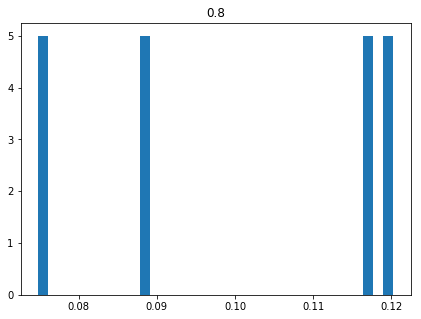

[0.11743000613510594, 0.11743000702942367, 0.11743001557193045, 0.11742999728598269, 0.11743000407967381, 0.08854814877225023, 0.0885481155158173, 0.08854810193212707, 0.088548061577893, 0.0885481199415392, 0.0743866875014114, 0.07438680174562608, 0.07438673053817256, 0.07438677970133965, 0.07438678298968622, 0.12016902790798484, 0.12016902172729353, 0.12016902639768334, 0.12016902365520243, 0.12016903831351441]


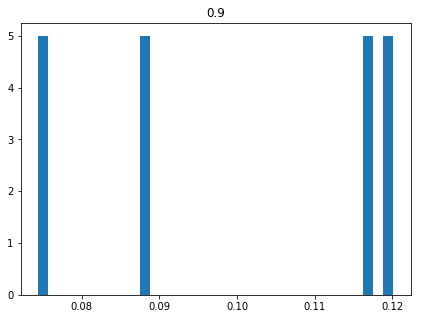

[0.11743010684607927, 0.11743045680611684, 0.11743021790264152, 0.11743016607118997, 0.1174301818461677, 0.08855116785634919, 0.08855126472075958, 0.08855141086548285, 0.08855042501997418, 0.0885516791643823, 0.07438886495282772, 0.07439021824125391, 0.07438894878937742, 0.07439075937017005, 0.074390178835755, 0.12016928844899312, 0.12016945460465633, 0.12016938663434794, 0.12016945570070243, 0.12016944470031424]


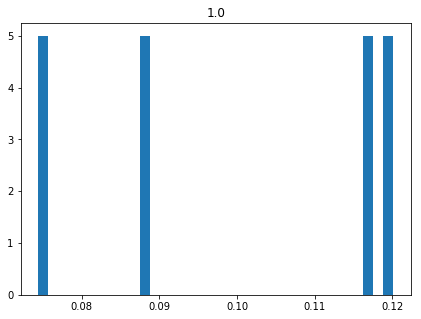

In [233]:
beta_values = {}
for b in betas: 
    beta_values[b] = []
    
for city in cities:
#     print city['name']
#     print len(city['lcosts'])
    all_costs = []
    beta_index = 0
    for lcost in city['lcosts']:
#         print len(lcost)
        beta_values[betas[beta_index]] += lcost 
#         print betas[beta_index]
        beta_index += 1

    
beta_list = beta_values.values()

beta_index = 0
for b in beta_list: 
    plt.hist(b, bins=35)
    print b
    plt.title(betas[beta_index])
    beta_index += 1
    plt.show()


In [84]:
##try log(y values) for all the graphs so show the pattern better
def plot2():
    for city in cities:
        scatter_line_plot(str('Log Global Costs Boxplot ' + city['name']), 'Beta Values', 'Log Global Cost Values', betas, city['gmeans'],
                city['gstd'])
        scatter_line_plot(str('Log Local Costs Boxplot ' + city['name']), 'Beta Values', 'Log Local Cost Values', betas, city['lmeans'],
                city['lstd'])
        scatter_line_plot(str('Log Overhead Boxplot ' + city['name']), 'Beta Values', 'Log Overhead Values', betas, city['omean'],
                city['ostd'])

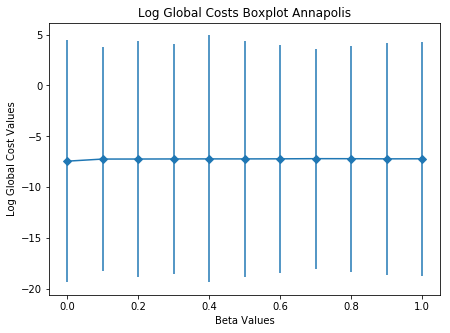

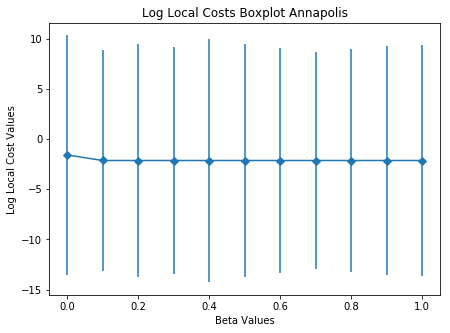

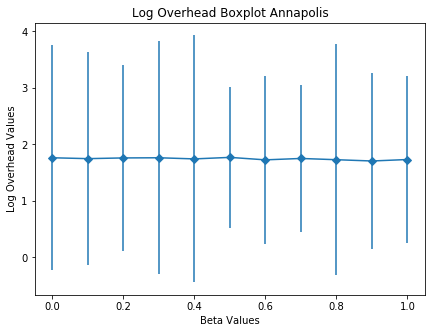

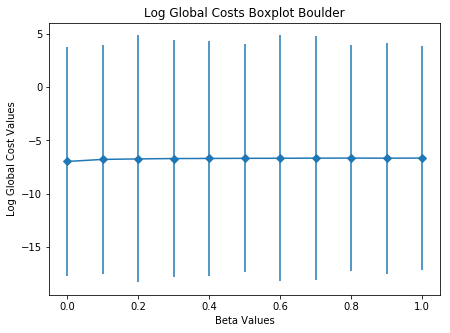

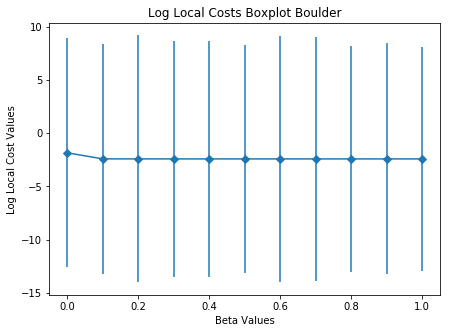

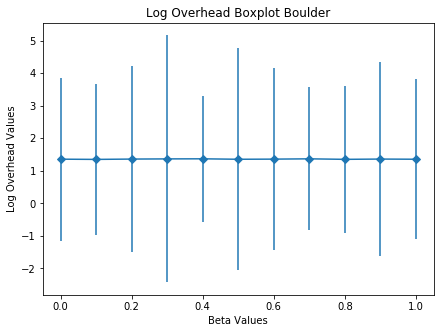

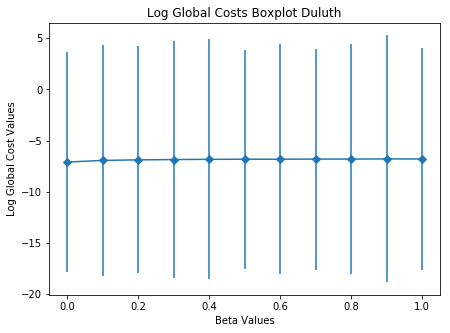

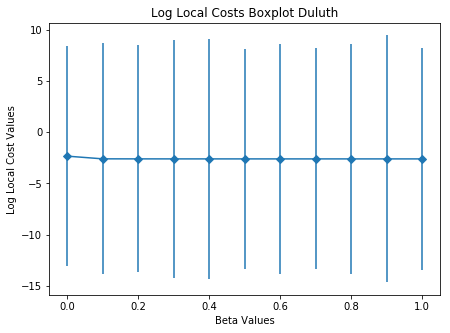

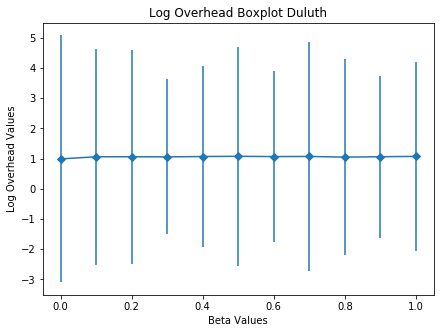

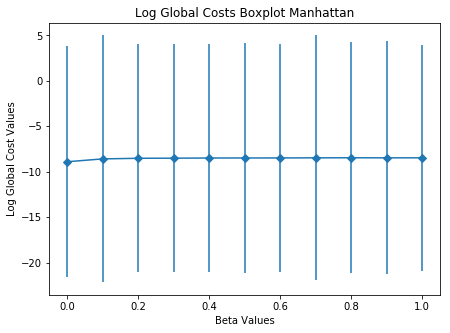

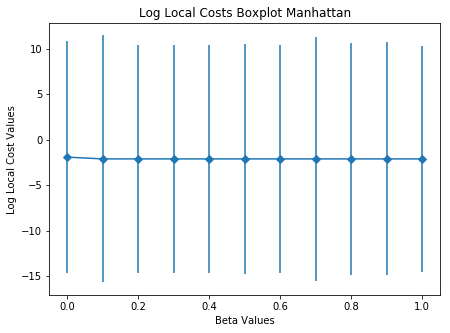

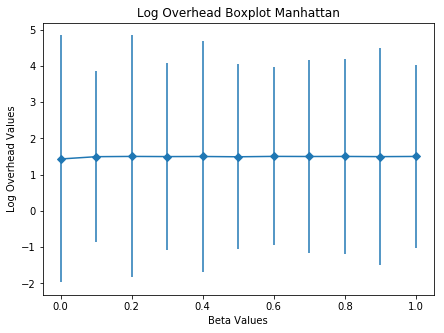

In [67]:
plot2()